Name: Khushi Shah


Roll no: B067

Aim: Use sobal operator to detect edges in the given image

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt 
from skimage.color import rgb2gray
from scipy import signal


In [ ]:
img=io.imread('/content/roof (1).tif')
img.shape

(834, 1114)

In [ ]:
img[2][3]

227

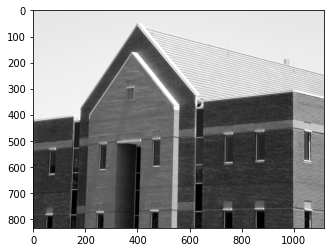

In [ ]:
plt.imshow(img, cmap = 'gray')

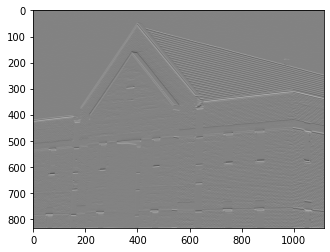

In [ ]:
# Horizontal edge detection filter
# assume we are using 3x3 filter
[rows,cols]=img.shape
horz_filter=[[-1,-2,-1],[0,0,0],[1,2,1]]
# mode='same' to retain size of image 
image_h=signal.convolve2d(img,horz_filter,mode='same')
plt.imshow(image_h, cmap = 'gray')
# python automatically converts negative pixel values to range of 0-255. Which is why we get lots of gray parts in image after filter. We do not want this. We want to remove negative values.

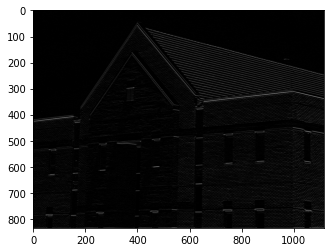

In [ ]:
# To remove negative values of pixels
for r in range(rows):
  for c in range(cols):
    if image_h[r][c]<0:
        image_h[r][c]=0
plt.imshow(image_h, cmap = 'gray')

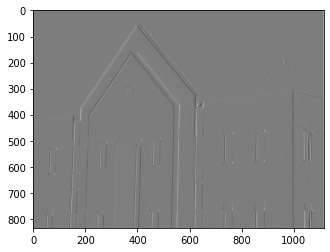

In [ ]:
vert_filter=[[-1,0,1],[-2,0,2],[-1,0,1]]
image_v=signal.convolve2d(img,vert_filter,mode='same')
plt.imshow(image_v, cmap = 'gray')

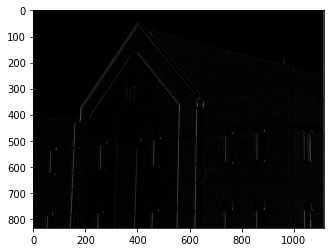

In [ ]:
for r in range(rows):
  for c in range(cols):
    if image_v[r][c]<0:
        image_v[r][c]=0
plt.imshow(image_v, cmap = 'gray')

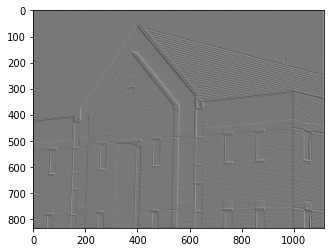

In [ ]:
forward_diagonal_filter=[[0,1,2],[-1,0,1],[-2,-1,0]]
image_fd=signal.convolve2d(img,forward_diagonal_filter,mode='same')
plt.imshow(image_fd, cmap = 'gray')

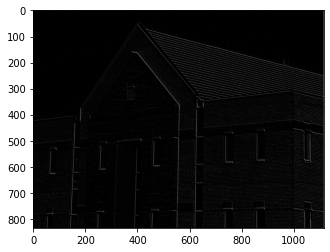

In [ ]:
for r in range(rows):
  for c in range(cols):
    if image_fd[r][c]<0:
        image_fd[r][c]=0
plt.imshow(image_fd, cmap = 'gray')

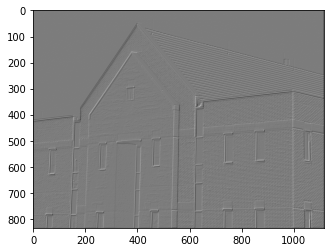

In [ ]:
reverse_diagonal_filter=[[2,1,0],[1,0,-1],[0,-1,-2]]
image_rd=signal.convolve2d(img,reverse_diagonal_filter,mode='same')
plt.imshow(image_rd, cmap = 'gray')

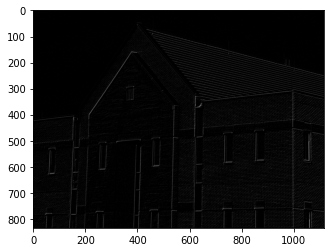

In [ ]:
for r in range(rows):
  for c in range(cols):
    if image_rd[r][c]<0:
        image_rd[r][c]=0
plt.imshow(image_rd, cmap = 'gray')

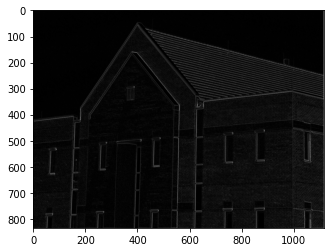

In [ ]:
image_all=image_h+image_v+image_fd+image_rd
plt.imshow(image_all, cmap = 'gray')

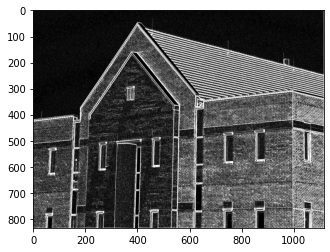

In [ ]:
for r in range(rows):
  for c in range(cols):
    if image_all[r][c]>200:
        image_all[r][c]=255
plt.imshow(image_all, cmap = 'gray')

Text(0.5, 1.0, 'All edges')

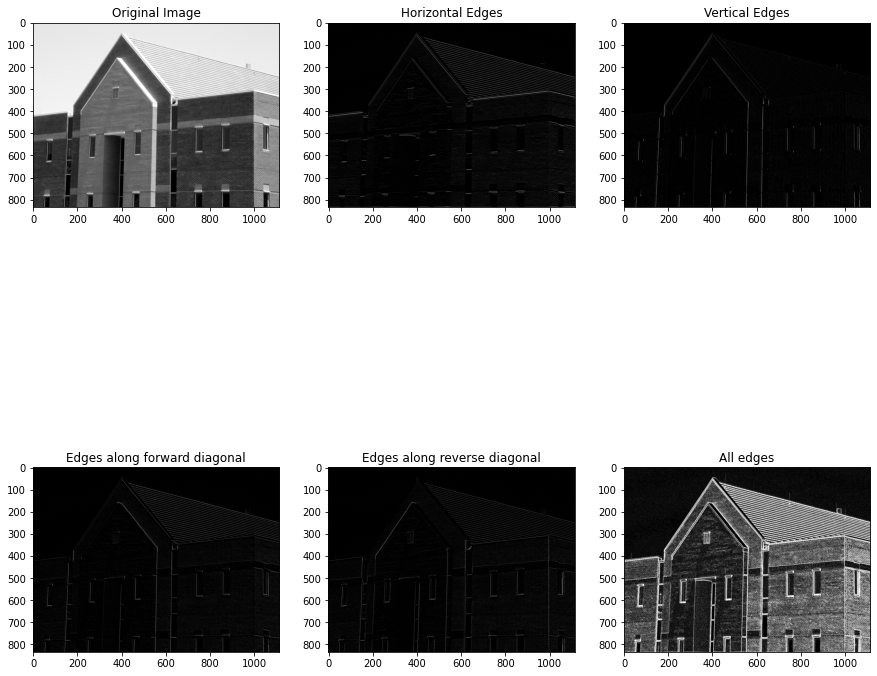

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.imshow(img, cmap = 'gray')
plt.title ('Original Image')
plt.subplot(2,3,2)
plt.imshow(image_h, cmap = 'gray')
plt.title ('Horizontal Edges')
plt.subplot(2,3,3)
plt.imshow(image_v, cmap = 'gray')
plt.title ('Vertical Edges')
plt.subplot(2,3,4)
plt.imshow(image_fd, cmap = 'gray')
plt.title ('Edges along forward diagonal')
plt.subplot(2,3,5)
plt.imshow(image_rd, cmap = 'gray')
plt.title ('Edges along reverse diagonal')
plt.subplot(2,3,6)
plt.imshow(image_all, cmap = 'gray')
plt.title ('All edges')


Laplacian filter

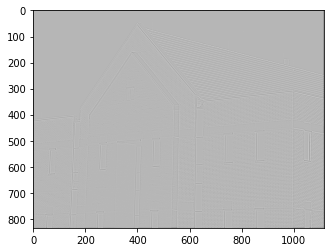

In [ ]:
# Variant of laplacian filter to detect horizontal, vertical and diagonal edges
lap_filter=[[1,1,1],[1,-8,1],[1,1,1]]
image_lap=signal.convolve2d(img,lap_filter,mode='same')
plt.imshow(image_lap, cmap = 'gray')

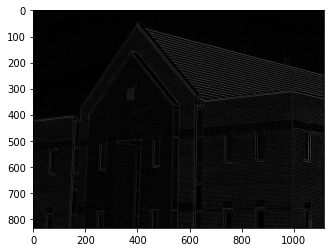

In [ ]:
for r in range(rows):
  for c in range(cols):
    if image_lap[r][c]<0:
        image_lap[r][c]=0
plt.imshow(image_lap, cmap = 'gray')

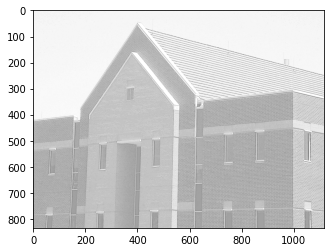

In [ ]:
image_edges=img-image_lap
plt.imshow(image_edges, cmap = 'gray')

Conclusion: Sobal filters are applied horizontal, vertical and diagonal edges of the given image. To improve the contrast of the filtered image all the negative values are converted to 0. to detect all the edges by using 1 filter, laplacian filter is used to filter the given image. The filtered image is too bright. To improve contrast of this bright image power law transformation can be used (gamma>1).